############ Generation 1 ############
[15.01831695 30.         29.90929612]
27718.038593020392
最好的位置：[15.01831695 30.         29.90929612]
最大的函数值：27718.038593020392
############ Generation 2 ############
[30.         27.04092765 30.        ]
30654.081855307886
最好的位置：[30.         27.04092765 30.        ]
最大的函数值：30654.081855307886
############ Generation 3 ############
[30.         27.02064522 30.        ]
30654.041290445843
最好的位置：[30.         27.04092765 30.        ]
最大的函数值：30654.081855307886
############ Generation 4 ############
[30.         27.21736672 30.        ]
30654.434733447804
最好的位置：[30.         27.21736672 30.        ]
最大的函数值：30654.434733447804
############ Generation 5 ############
[29.70947251  1.55653147 30.        ]
30533.724091150732
最好的位置：[30.         27.21736672 30.        ]
最大的函数值：30654.434733447804
############ Generation 6 ############
[29.68065909  1.5511666  29.84846191]
30119.778840288567
最好的位置：[30.         27.21736672 30.        ]
最大的函数值：30654.434733447804
####

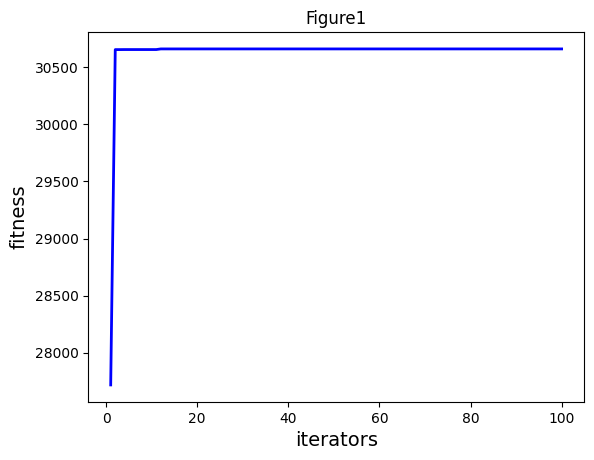

In [2]:



class ACO:
    def __init__(self, parameters):
        # 初始化
        self.NGEN = parameters[0]  # 迭代的代数
        self.pop_size = parameters[1]  # 种群大小
        self.var_num = len(parameters[2])  # 变量个数
        self.bound = []  # 变量的约束范围
        self.bound.append(parameters[2])
        self.bound.append(parameters[3])

        self.pop_x = np.zeros((self.pop_size, self.var_num))  # 所有蚂蚁的位置
        self.g_best = np.zeros((1, self.var_num))  # 全局蚂蚁最优的位置

        # 初始化第0代初始全局最优解
        temp = -1
        for i in range(self.pop_size):
            for j in range(self.var_num):
                self.pop_x[i][j] = np.random.uniform(self.bound[0][j], self.bound[1][j])
            fit = self.fitness(self.pop_x[i])
            if fit > temp:
                self.g_best = self.pop_x[i]
                temp = fit

    def fitness(self, ind_var):
        """
        个体适应值计算
        """
        x1 = ind_var[0]
        x2 = ind_var[1]
        x3 = ind_var[2]

        y = 4 * x1 ** 2 + 2 * x2 + x3 ** 3
        return y

    def update_operator(self, gen, t, t_max):
        """
        更新算子：根据概率更新下一时刻的位置
        """
        rou = 0.8  # 信息素挥发系数
        Q = 1  # 信息释放总量
        lamda = 1 / gen
        pi = np.zeros(self.pop_size)
        for i in range(self.pop_size):
            for j in range(self.var_num):
                pi[i] = (t_max - t[i]) / t_max
                # 更新位置
                if pi[i] < np.random.uniform(0, 1):
                    self.pop_x[i][j] = self.pop_x[i][j] + np.random.uniform(-1, 1) * lamda
                else:
                    self.pop_x[i][j] = self.pop_x[i][j] + np.random.uniform(-1, 1) * (
                            self.bound[1][j] - self.bound[0][j]) / 2
                # 越界保护
                if self.pop_x[i][j] < self.bound[0][j]:
                    self.pop_x[i][j] = self.bound[0][j]
                if self.pop_x[i][j] > self.bound[1][j]:
                    self.pop_x[i][j] = self.bound[1][j]
            # 更新t值
            t[i] = (1 - rou) * t[i] + Q * self.fitness(self.pop_x[i])
            # 更新全局最优值
            if self.fitness(self.pop_x[i]) > self.fitness(self.g_best):
                self.g_best = self.pop_x[i]
        t_max = np.max(t)
        return t_max, t

    def main(self):
        popobj = []
        best = np.zeros((1, self.var_num))[0]
        for gen in range(1, self.NGEN + 1):
            if gen == 1:
                tmax, t = self.update_operator(gen, np.array(list(map(self.fitness, self.pop_x))),
                                               np.max(np.array(list(map(self.fitness, self.pop_x)))))
            else:
                tmax, t = self.update_operator(gen, t, tmax)

            print('############ Generation {} ############'.format(str(gen)))
            print(self.g_best)
            print(self.fitness(self.g_best))
            if self.fitness(self.g_best) > self.fitness(best):
                best = self.g_best.copy()
            popobj.append(self.fitness(best))
            print('最好的位置：{}'.format(best))
            print('最大的函数值：{}'.format(self.fitness(best)))
        print("---- End of (successful) Searching ----")

        plt.figure()
        plt.title("Figure1")
        plt.xlabel("iterators", size=14)
        plt.ylabel("fitness", size=14)
        t = [t for t in range(1, self.NGEN + 1)]
        plt.plot(t, popobj, color='b', linewidth=2)
        plt.show()


if __name__ == '__main__':
    NGEN = 100
    popsize = 50
    low = [1, 1, 1]
    up = [30, 30, 30]
    parameters = [NGEN, popsize, low, up]
    aco = ACO(parameters)
    aco.main()

[ 0 23 46 17 14 39 41 40 16 15 27 31 13 22 35  5 45 47  9 10 37 26 20 32
 29 28  8  1 34  7 49  4 48 21  6 12 36  2 42 38 43 33 30 18 24 44 11 19
 25  3]
5.546949453937272


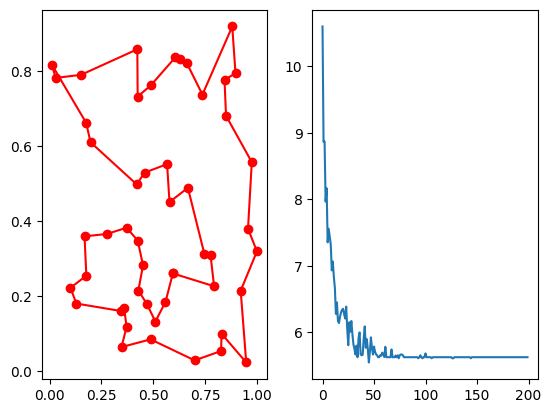

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import spatial

num_points = 50

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


from sko.ACA import ACA_TSP

aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
              size_pop=50, max_iter=200,
              distance_matrix=distance_matrix)

best_points, best_distance = aca.run()
print(best_points)
print(best_distance)
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(aca.generation_best_Y)
plt.show()
